<a href="https://colab.research.google.com/github/Shaddynetwork/PORTFOLIO-REBALANCING/blob/main/CAPSTONE_PROJECT_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*ddddd text*

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten


In [ ]:
import yfinance as yf
import pandas as pd

# List of tickers (10 ETFs and 10 equities from the Japanese market)
tickers = ['DXJ', 'EWJ', 'JPXN', 'DBJP', 'HEWJ', '7203.T', '9984.T', '6758.T', '6701.T', '6861.T', '6752.T', '6976.T', '6594.T', '6367.T', '6301.T', '6098.T', '6305.T', '6326.T', '6762.T', '6841.T']

# Download historical data (adjust the period as needed)
start_date = '1998-01-01'
end_date = '2023-03-31'

# Create a list of DataFrames for each ticker
dfs = []
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
    data.columns = [f"{ticker}_{col}" for col in data.columns]
    dfs.append(data)

# Combine the DataFrames into a single DataFrame
portfolio_data = pd.concat(dfs, axis=1)
portfolio_data.insert(0, 'Date', portfolio_data.index)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

##### ETF and Equity - Japan

In [ ]:
portfolio_data

,Date,DXJ_Open,DXJ_High,DXJ_Low,DXJ_Close,DXJ_Volume,EWJ_Open,EWJ_High,EWJ_Low,EWJ_Close,...,6762.T_Open,6762.T_High,6762.T_Low,6762.T_Close,6762.T_Volume,6841.T_Open,6841.T_High,6841.T_Low,6841.T_Close,6841.T_Volume
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-02,1998-01-02,NaN,NaN,NaN,NaN,NaN,27.306938,27.306938,27.135197,27.135197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05,1998-01-05,NaN,NaN,NaN,NaN,NaN,26.619963,27.135188,26.276480,26.448221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-06,1998-01-06,NaN,NaN,NaN,NaN,NaN,26.104738,26.448221,25.932996,26.448221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-07,1998-01-07,NaN,NaN,NaN,NaN,NaN,26.963457,27.306940,26.619973,27.306940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-08,1998-01-08,NaN,NaN,NaN,NaN,NaN,26.963446,26.963446,26.791704,26.791704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,2023-03-24,65.081733,65.533350,64.812675,65.504524,99100.0,55.817231,55.964142,55.591961,55.954350,...,4557.879200,4572.441114,4509.339485,4528.755371,1485900.0,1998.955085,2013.653284,1985.236766,2009.733765,714100.0
2023-03-27,2023-03-27,66.188228,66.585846,66.062158,66.488861,439600.0,56.032700,56.257966,55.973937,56.199203,...,4553.025228,4553.025228,4509.339485,4528.755371,1187200.0,2033.250941,2035.210701,2004.834422,2029.331421,741900.0
2023-03-28,2023-03-28,66.207620,66.498560,66.120342,66.275505,120300.0,56.287349,56.355908,56.199201,56.306938,...,4538.462989,4567.586816,4514.193133,4553.024902,1031700.0,2046.969124,2060.687442,2044.029484,2057.747803,588100.0


In [ ]:
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6558 entries, 1998-01-02 to 2023-03-30
Columns: 101 entries, Date to 6841.T_Volume
dtypes: datetime64[ns](1), float64(100)
memory usage: 5.1 MB


In [ ]:
portfolio_data.describe()

,Date,DXJ_Open,DXJ_High,DXJ_Low,DXJ_Close,DXJ_Volume,EWJ_Open,EWJ_High,EWJ_Low,EWJ_Close,...,6762.T_Open,6762.T_High,6762.T_Low,6762.T_Close,6762.T_Volume,6841.T_Open,6841.T_High,6841.T_Low,6841.T_Close,6841.T_Volume
count,6558,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,6352.000000,6352.000000,6352.000000,6352.000000,...,5816.000000,5816.000000,5816.000000,5816.000000,5.816000e+03,5816.000000,5816.000000,5816.000000,5816.000000,5.816000e+03
mean,2010-08-21 16:42:22.726440960,36.847458,37.016845,36.674613,36.859809,1.924938e+06,39.310973,39.517799,39.092389,39.319215,...,2152.232357,2178.536804,2124.691262,2151.077933,3.375717e+06,1171.598901,1185.058491,1157.240152,1171.254801,1.336327e+06
min,1998-01-02 00:00:00,17.864211,17.864211,17.593257,17.710262,0.000000e+00,18.790610,18.941903,18.730093,18.881384,...,655.785710,670.977403,644.133318,655.785461,0.000000e+00,259.152544,259.972599,259.152496,259.152496,0.000000e+00
25%,2004-05-03 06:00:00,26.162734,26.281722,26.042552,26.151314,3.217500e+04,30.842225,31.021863,30.641519,30.852675,...,1344.971335,1368.452023,1325.809094,1347.450562,1.941900e+06,721.502638,732.894653,707.721313,721.445618,7.868250e+05
50%,2010-08-21 12:00:00,34.080153,34.217532,33.947391,34.104132,5.127500e+05,38.832283,39.047258,38.576928,38.839937,...,1907.831995,1931.862797,1881.820598,1906.941772,2.863650e+06,1104.717357,1116.707021,1090.397511,1102.013245,1.152300e+06
75%,2016-12-08 18:00:00,44.256124,44.502044,44.117738,44.295444,2.954000e+06,45.323250,45.481116,45.124712,45.366428,...,2640.374326,2669.368591,2607.696449,2636.977295,4.149000e+06,1576.607502,1590.661996,1557.844896,1573.796997,1.654825e+06
max,2023-03-30 00:00:00,70.376292,70.472380,69.867010,70.203323,2.920030e+07,70.555661,70.804024,70.278627,70.804024,...,5630.981370,5699.729047,5540.361623,5690.354492,5.686080e+07,2686.830887,2686.830887,2539.848891,2544.748291,1.001490e+07
std,NaN,12.000221,12.043454,11.964808,12.008981,2.900152e+06,10.978800,10.987657,10.977309,10.985527,...,1031.972702,1042.350090,1019.729842,1031.072948,2.366915e+06,518.517245,522.379693,513.878138,518.260466,8.733401e+05


In [ ]:
portfolio_data.columns

Index(['Date', 'DXJ_Open', 'DXJ_High', 'DXJ_Low', 'DXJ_Close', 'DXJ_Volume',
       'EWJ_Open', 'EWJ_High', 'EWJ_Low', 'EWJ_Close',
       ...
       '6762.T_Open', '6762.T_High', '6762.T_Low', '6762.T_Close',
       '6762.T_Volume', '6841.T_Open', '6841.T_High', '6841.T_Low',
       '6841.T_Close', '6841.T_Volume'],
      dtype='object', length=101)

In [ ]:
portfolio_data.dropna()

,Date,DXJ_Open,DXJ_High,DXJ_Low,DXJ_Close,DXJ_Volume,EWJ_Open,EWJ_High,EWJ_Low,EWJ_Close,...,6762.T_Open,6762.T_High,6762.T_Low,6762.T_Close,6762.T_Volume,6841.T_Open,6841.T_High,6841.T_Low,6841.T_Close,6841.T_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-16,2014-10-16,31.517634,32.243911,31.435415,32.093174,12347000.0,36.899524,37.621023,36.865166,37.414883,...,1507.001258,1535.275238,1507.001258,1529.620483,4452900.0,1056.421173,1077.980789,1052.971634,1074.531250,2258200.0
2014-10-17,2014-10-17,32.045208,32.476863,32.004097,32.428902,7396900.0,37.449234,37.655378,37.243093,37.586662,...,1555.067065,1569.204004,1529.620514,1535.275269,5014200.0,1081.430492,1096.953418,1073.669029,1075.393799,2240700.0
2014-10-20,2014-10-20,32.805741,33.086659,32.798888,32.963329,5259100.0,38.067673,38.445600,38.067673,38.342529,...,1594.650531,1628.579266,1586.168348,1617.269653,5063700.0,1101.265470,1138.348019,1101.265470,1135.760864,2237600.0
2014-10-21,2014-10-21,32.730373,33.011291,32.627597,32.963329,4377400.0,37.998951,38.342520,37.998951,38.273808,...,1631.406700,1634.234026,1557.894373,1560.721802,4269000.0,1143.522220,1160.769916,1115.925907,1118.513062,2512000.0
2014-10-22,2014-10-22,33.244249,33.388133,32.929074,32.997589,3467400.0,38.514307,38.686093,38.205092,38.308163,...,1611.615112,1617.269868,1586.168558,1611.615112,4373100.0,1140.935171,1163.357178,1134.898477,1163.357178,1770500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,2023-03-24,65.081733,65.533350,64.812675,65.504524,99100.0,55.817231,55.964142,55.591961,55.954350,...,4557.879200,4572.441114,4509.339485,4528.755371,1485900.0,1998.955085,2013.653284,1985.236766,2009.733765,714100.0
2023-03-27,2023-03-27,66.188228,66.585846,66.062158,66.488861,439600.0,56.032700,56.257966,55.973937,56.199203,...,4553.025228,4553.025228,4509.339485,4528.755371,1187200.0,2033.250941,2035.210701,2004.834422,2029.331421,741900.0
2023-03-28,2023-03-28,66.207620,66.498560,66.120342,66.275505,120300.0,56.287349,56.355908,56.199201,56.306938,...,4538.462989,4567.586816,4514.193133,4553.024902,1031700.0,2046.969124,2060.687442,2044.029484,2057.747803,588100.0


In [ ]:
close_prices = portfolio_data.filter(regex='_Close$', axis=1)
close_prices = close_prices.dropna()


In [ ]:
close_prices


,DXJ_Close,EWJ_Close,JPXN_Close,DBJP_Close,HEWJ_Close,7203.T_Close,9984.T_Close,6758.T_Close,6701.T_Close,6861.T_Close,6752.T_Close,6976.T_Close,6594.T_Close,6367.T_Close,6301.T_Close,6098.T_Close,6305.T_Close,6326.T_Close,6762.T_Close,6841.T_Close
Date,,,,,,,,,,,,,,,,,,,,
2014-10-16,32.093174,37.414883,39.281071,24.268160,13.670456,906.504517,3180.625488,1691.834473,2791.325195,10522.921875,914.241028,894.483887,3022.373535,5418.528320,1749.524536,1022.327454,1550.596802,1272.621338,1529.620483,1074.531250
2014-10-17,32.428902,37.586662,39.314774,24.541544,13.734231,883.683777,3203.143555,1706.488159,2740.574219,10309.105469,905.824158,901.520325,2984.427002,5350.326172,1721.198364,1088.333130,1551.401245,1272.204712,1535.275269,1075.393799
2014-10-20,32.963329,38.342529,40.503078,25.039248,14.018308,929.479370,3391.729248,1772.667847,2918.204102,10765.729492,946.706543,935.821960,3112.152100,5624.931152,1786.423096,1166.619751,1612.523926,1338.439453,1617.269653,1135.760864
2014-10-21,32.963329,38.273808,40.182816,25.053265,14.006709,914.522583,3310.102295,1746.196045,2875.911133,10565.202148,940.694580,919.111023,3100.582764,5464.297363,1745.797363,1155.874756,1565.877563,1279.286499,1560.721802,1118.513062
2014-10-22,32.997589,38.308163,40.359814,25.095325,14.076280,930.404419,3419.406982,1804.812500,2968.955566,10797.138672,962.338013,938.460632,3247.282471,5586.343262,1796.859497,1165.084961,1599.656128,1300.948120,1611.615112,1163.357178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,65.504524,55.954350,59.420017,48.204487,27.088911,1731.177246,4921.960449,11478.145508,4805.041504,61975.574219,1092.667114,4120.097656,6764.548828,22566.494141,3026.797607,3698.477539,2822.555420,1867.473267,4528.755371,2009.733765
2023-03-27,66.488861,56.199203,59.790176,48.811192,27.402418,1736.999634,4907.111328,11334.606445,4883.172852,61736.710938,1108.600952,4100.777344,6673.083496,22664.824219,3060.827637,3673.655273,2851.425781,1870.406372,4528.755371,2029.331421
2023-03-28,66.275505,56.306938,59.965515,48.650032,27.304449,1752.040649,4838.805664,11215.816406,4878.289551,62194.531250,1116.326416,4086.286865,6606.205078,22571.410156,3082.569336,3636.918945,2887.032471,1857.695801,4553.024902,2057.747803


In [ ]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2014-10-16 to 2023-03-30
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DXJ_Close     2014 non-null   float64
 1   EWJ_Close     2014 non-null   float64
 2   JPXN_Close    2014 non-null   float64
 3   DBJP_Close    2014 non-null   float64
 4   HEWJ_Close    2014 non-null   float64
 5   7203.T_Close  2014 non-null   float64
 6   9984.T_Close  2014 non-null   float64
 7   6758.T_Close  2014 non-null   float64
 8   6701.T_Close  2014 non-null   float64
 9   6861.T_Close  2014 non-null   float64
 10  6752.T_Close  2014 non-null   float64
 11  6976.T_Close  2014 non-null   float64
 12  6594.T_Close  2014 non-null   float64
 13  6367.T_Close  2014 non-null   float64
 14  6301.T_Close  2014 non-null   float64
 15  6098.T_Close  2014 non-null   float64
 16  6305.T_Close  2014 non-null   float64
 17  6326.T_Close  2014 non-null   float64
 18  6762.T_Clo

In [ ]:
weekly_price_data = close_prices.resample('W').last()
weekly_price_data


,DXJ_Close,EWJ_Close,JPXN_Close,DBJP_Close,HEWJ_Close,7203.T_Close,9984.T_Close,6758.T_Close,6701.T_Close,6861.T_Close,6752.T_Close,6976.T_Close,6594.T_Close,6367.T_Close,6301.T_Close,6098.T_Close,6305.T_Close,6326.T_Close,6762.T_Close,6841.T_Close
Date,,,,,,,,,,,,,,,,,,,,
2014-10-19,32.428902,37.586662,39.314774,24.541544,13.734231,883.683777,3203.143555,1706.488159,2740.574219,10309.105469,905.824158,901.520325,2984.427002,5350.326172,1721.198364,1088.333130,1551.401245,1272.204712,1535.275269,1075.393799
2014-10-26,33.682762,38.686096,40.528355,25.628075,14.325568,948.445068,3462.096924,1783.540283,3028.165283,10925.188477,965.945007,937.581360,3196.839600,5680.570801,1809.904297,1111.358887,1620.566528,1325.942261,1651.198730,1185.779053
2014-11-02,36.875618,41.434658,43.469589,28.516148,15.943064,1001.950317,3724.334717,1958.916260,3265.005371,12679.206055,1046.107056,982.437073,3342.150391,6114.915039,1945.199951,1134.384399,1797.501953,1447.580566,1741.675049,1297.889160
2014-11-09,36.409710,39.751163,41.767220,27.780106,15.664788,1051.137939,3649.745117,2134.764893,3273.463623,12973.960938,1136.288330,1002.666382,3391.666992,6406.572754,2055.523682,1194.250366,1896.424683,1483.405640,1832.152100,1308.237915
2014-11-16,37.423756,40.438309,42.390854,28.705408,16.128590,1074.575684,3820.034668,2270.432617,3061.999512,13529.643555,1159.535034,1211.115479,3464.322266,6390.417480,2016.016235,1125.174194,2000.977539,1466.742920,2049.861328,1324.623047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,69.213593,56.199203,59.731731,50.204708,28.225372,1828.701416,5500.082520,11428.649414,4707.378418,59446.074219,1175.715698,4129.757812,6754.713867,23004.056641,3233.814453,3669.683838,3185.359131,2029.777222,4567.586426,2068.526611
2023-03-12,68.195038,55.611549,59.176495,49.379971,27.725721,1839.860962,5289.226562,11582.086914,4980.835938,59733.972656,1180.061279,4129.757812,6711.439941,23215.464844,3233.814453,3509.830322,3194.982666,2053.731689,4630.688477,2132.218994
2023-03-19,64.216911,54.563564,58.066021,47.484024,26.657839,1733.118042,4841.775391,11512.792969,4848.990234,60223.894531,1117.291992,4013.834717,6321.971680,22227.257812,2993.712646,3455.221924,2835.065918,1887.027954,4402.551758,2025.411987


In [ ]:

# Get the first date in the DataFrame
start_date = weekly_price_data.index.min()

# Calculate the end date for the first 6 years
end_date = start_date + pd.DateOffset(years=6)

# Filter the DataFrame to get the first 6 years of data
first_six = weekly_price_data.loc[start_date:end_date]

In [ ]:
first_six

,DXJ_Close,EWJ_Close,JPXN_Close,DBJP_Close,HEWJ_Close,7203.T_Close,9984.T_Close,6758.T_Close,6701.T_Close,6861.T_Close,6752.T_Close,6976.T_Close,6594.T_Close,6367.T_Close,6301.T_Close,6098.T_Close,6305.T_Close,6326.T_Close,6762.T_Close,6841.T_Close
Date,,,,,,,,,,,,,,,,,,,,
2014-10-19,32.428902,37.586662,39.314774,24.541544,13.734231,883.683777,3203.143555,1706.488159,2740.574219,10309.105469,905.824158,901.520325,2984.427002,5350.326172,1721.198364,1088.333130,1551.401245,1272.204712,1535.275269,1075.393799
2014-10-26,33.682762,38.686096,40.528355,25.628075,14.325568,948.445068,3462.096924,1783.540283,3028.165283,10925.188477,965.945007,937.581360,3196.839600,5680.570801,1809.904297,1111.358887,1620.566528,1325.942261,1651.198730,1185.779053
2014-11-02,36.875618,41.434658,43.469589,28.516148,15.943064,1001.950317,3724.334717,1958.916260,3265.005371,12679.206055,1046.107056,982.437073,3342.150391,6114.915039,1945.199951,1134.384399,1797.501953,1447.580566,1741.675049,1297.889160
2014-11-09,36.409710,39.751163,41.767220,27.780106,15.664788,1051.137939,3649.745117,2134.764893,3273.463623,12973.960938,1136.288330,1002.666382,3391.666992,6406.572754,2055.523682,1194.250366,1896.424683,1483.405640,1832.152100,1308.237915
2014-11-16,37.423756,40.438309,42.390854,28.705408,16.128590,1074.575684,3820.034668,2270.432617,3061.999512,13529.643555,1159.535034,1211.115479,3464.322266,6390.417480,2016.016235,1125.174194,2000.977539,1466.742920,2049.861328,1324.623047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-20,44.048809,55.974625,59.597866,37.151562,20.982786,1294.458862,6365.961426,8121.802734,5541.303711,45868.875000,879.360352,3008.584473,9173.334961,18568.472656,2130.579834,4225.854004,3340.292480,1741.219604,3568.108398,1600.976074
2020-09-27,43.914593,55.502342,59.021679,37.197472,21.015797,1293.171387,5995.383789,7904.193359,5634.907227,46538.492188,829.014587,3116.200684,9272.139648,18765.955078,2074.070312,4148.215332,3399.291992,1709.544434,3503.008057,1568.092285
2020-10-04,43.673008,55.530685,59.123913,37.206657,20.982786,1268.305176,6366.651367,7588.777832,5700.553223,46656.664062,803.189331,3172.453613,9556.406250,18189.697266,2081.384277,3983.186279,3394.657471,1734.232544,3574.829346,1550.515503


In [ ]:
first_six.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 314 entries, 2014-10-19 to 2020-10-18
Freq: W-SUN
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DXJ_Close     313 non-null    float64
 1   EWJ_Close     313 non-null    float64
 2   JPXN_Close    313 non-null    float64
 3   DBJP_Close    313 non-null    float64
 4   HEWJ_Close    313 non-null    float64
 5   7203.T_Close  313 non-null    float64
 6   9984.T_Close  313 non-null    float64
 7   6758.T_Close  313 non-null    float64
 8   6701.T_Close  313 non-null    float64
 9   6861.T_Close  313 non-null    float64
 10  6752.T_Close  313 non-null    float64
 11  6976.T_Close  313 non-null    float64
 12  6594.T_Close  313 non-null    float64
 13  6367.T_Close  313 non-null    float64
 14  6301.T_Close  313 non-null    float64
 15  6098.T_Close  313 non-null    float64
 16  6305.T_Close  313 non-null    float64
 17  6326.T_Close  313 non-null    float64
 18 

In [ ]:
import pandas as pd
import numpy as np



# Calculate weekly returns
weekly_price_data_returns = weekly_price_data.pct_change()

# Calculate 52-week rolling volatility
weekly_price_data_rolling_volatility = weekly_price_data_returns.rolling(52).std() * np.sqrt(52)

# Drop the first 51 rows (since we don't have enough data for the first 51 weeks)
weekly_price_data_rolling_volatility = weekly_price_data_rolling_volatility.dropna()
weekly_price_data_rolling_volatility


,DXJ_Close,EWJ_Close,JPXN_Close,DBJP_Close,HEWJ_Close,7203.T_Close,9984.T_Close,6758.T_Close,6701.T_Close,6861.T_Close,6752.T_Close,6976.T_Close,6594.T_Close,6367.T_Close,6301.T_Close,6098.T_Close,6305.T_Close,6326.T_Close,6762.T_Close,6841.T_Close
Date,,,,,,,,,,,,,,,,,,,,
2015-10-18,0.221023,0.180271,0.160104,0.232044,0.230846,0.191841,0.310654,0.399368,0.266038,0.323935,0.318564,0.407858,0.256864,0.310022,0.303242,0.233211,0.350901,0.300120,0.319666,0.341216
2015-10-25,0.221661,0.179626,0.159251,0.231132,0.230248,0.179486,0.301123,0.400020,0.246462,0.321466,0.312991,0.414239,0.258269,0.305859,0.302382,0.233956,0.351435,0.301281,0.321454,0.327180
2015-11-01,0.203070,0.166301,0.142861,0.204392,0.203508,0.171914,0.292716,0.390505,0.246971,0.286697,0.310521,0.412698,0.255152,0.297563,0.292369,0.234792,0.334974,0.287959,0.317723,0.313481
2015-11-08,0.204413,0.160894,0.137124,0.203622,0.204195,0.165523,0.292960,0.383585,0.248673,0.286988,0.300350,0.416049,0.255313,0.295026,0.286171,0.228969,0.331299,0.289305,0.329183,0.321444
2015-11-15,0.203213,0.160212,0.136620,0.201650,0.202738,0.164308,0.291591,0.379817,0.239723,0.286173,0.299912,0.367498,0.257422,0.301369,0.286271,0.221365,0.328030,0.289310,0.309493,0.321262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,0.146006,0.196116,0.195062,0.157346,0.156245,0.250766,0.376748,0.300977,0.221167,0.344090,0.300657,0.399637,0.335642,0.276673,0.277097,0.402171,0.327308,0.280218,0.406203,0.290186
2023-03-12,0.145519,0.191563,0.190329,0.156620,0.155757,0.243816,0.365232,0.301038,0.227416,0.339909,0.299955,0.395701,0.322354,0.276644,0.277156,0.402621,0.327295,0.280237,0.373771,0.291005
2023-03-19,0.142682,0.181060,0.180908,0.141747,0.140884,0.235360,0.360915,0.290596,0.223859,0.332787,0.296622,0.368861,0.309214,0.267543,0.284955,0.374316,0.340791,0.278696,0.369680,0.276086


In [ ]:
# Get the current column names
weekly_price_data_rolling_volatility_cols = weekly_price_data_rolling_volatility.columns

# Create a new list of column names with '_Close' replaced by '_Volatility'
new_cols = [col.replace('_Close', '_Volatility') for col in weekly_price_data_rolling_volatility_cols]

# Rename the columns
weekly_price_data_rolling_volatility.columns = new_cols
weekly_price_data_rolling_volatility


,DXJ_Volatility,EWJ_Volatility,JPXN_Volatility,DBJP_Volatility,HEWJ_Volatility,7203.T_Volatility,9984.T_Volatility,6758.T_Volatility,6701.T_Volatility,6861.T_Volatility,6752.T_Volatility,6976.T_Volatility,6594.T_Volatility,6367.T_Volatility,6301.T_Volatility,6098.T_Volatility,6305.T_Volatility,6326.T_Volatility,6762.T_Volatility,6841.T_Volatility
Date,,,,,,,,,,,,,,,,,,,,
2015-10-18,0.221023,0.180271,0.160104,0.232044,0.230846,0.191841,0.310654,0.399368,0.266038,0.323935,0.318564,0.407858,0.256864,0.310022,0.303242,0.233211,0.350901,0.300120,0.319666,0.341216
2015-10-25,0.221661,0.179626,0.159251,0.231132,0.230248,0.179486,0.301123,0.400020,0.246462,0.321466,0.312991,0.414239,0.258269,0.305859,0.302382,0.233956,0.351435,0.301281,0.321454,0.327180
2015-11-01,0.203070,0.166301,0.142861,0.204392,0.203508,0.171914,0.292716,0.390505,0.246971,0.286697,0.310521,0.412698,0.255152,0.297563,0.292369,0.234792,0.334974,0.287959,0.317723,0.313481
2015-11-08,0.204413,0.160894,0.137124,0.203622,0.204195,0.165523,0.292960,0.383585,0.248673,0.286988,0.300350,0.416049,0.255313,0.295026,0.286171,0.228969,0.331299,0.289305,0.329183,0.321444
2015-11-15,0.203213,0.160212,0.136620,0.201650,0.202738,0.164308,0.291591,0.379817,0.239723,0.286173,0.299912,0.367498,0.257422,0.301369,0.286271,0.221365,0.328030,0.289310,0.309493,0.321262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,0.146006,0.196116,0.195062,0.157346,0.156245,0.250766,0.376748,0.300977,0.221167,0.344090,0.300657,0.399637,0.335642,0.276673,0.277097,0.402171,0.327308,0.280218,0.406203,0.290186
2023-03-12,0.145519,0.191563,0.190329,0.156620,0.155757,0.243816,0.365232,0.301038,0.227416,0.339909,0.299955,0.395701,0.322354,0.276644,0.277156,0.402621,0.327295,0.280237,0.373771,0.291005
2023-03-19,0.142682,0.181060,0.180908,0.141747,0.140884,0.235360,0.360915,0.290596,0.223859,0.332787,0.296622,0.368861,0.309214,0.267543,0.284955,0.374316,0.340791,0.278696,0.369680,0.276086


In [ ]:
weekly_price_data_rolling_volatility.columns

Index(['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility',
       'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility',
       '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility',
       '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility',
       '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility',
       '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility',
       '6762.T_Volatility', '6841.T_Volatility'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans


weekly_price_data_rolling_volatility = weekly_price_data_rolling_volatility.dropna()  # Drop any rows with missing values

# Create a NumPy array with only the volatility values
X = weekly_price_data_rolling_volatility.values

# Perform K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels for each asset
cluster_labels = kmeans.labels_

# Create a new DataFrame with the cluster labels
weekly_price_data_rolling_volatility['Cluster'] = cluster_labels

# Print the mean volatility for each cluster
for cluster in range(3):
    cluster_volatility = weekly_price_data_rolling_volatility[weekly_price_data_rolling_volatility['Cluster'] == cluster].drop('Cluster', axis=1)
    print(f"Cluster {cluster} mean volatility: {cluster_volatility.mean().mean()}")


Cluster 0 mean volatility: 0.3066275585308468
Cluster 1 mean volatility: 0.39930868487313703
Cluster 2 mean volatility: 0.24197866550411362


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans

# Assuming your volatility data is in a DataFrame 'volatility_data'
X = weekly_price_data_rolling_volatility.values
print(X)

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_


[[0.22102346 0.18027122 0.16010416 ... 0.319666   0.34121561 2.        ]
 [0.22166145 0.17962626 0.15925086 ... 0.32145384 0.32718017 2.        ]
 [0.20307048 0.16630062 0.14286144 ... 0.31772344 0.31348094 2.        ]
 ...
 [0.14268168 0.18106014 0.18090761 ... 0.36967991 0.27608633 2.        ]
 [0.14032979 0.1828646  0.18250776 ... 0.34906008 0.26906512 2.        ]
 [0.14369647 0.18317029 0.1827672  ... 0.3492459  0.26755705 2.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_means = []
for cluster in range(3):
    cluster_volatility = weekly_price_data_rolling_volatility.iloc[labels == cluster]
    cluster_mean = cluster_volatility.mean().mean()
    cluster_means.append(cluster_mean)

# Sort the cluster means to identify low, medium, and high volatility clusters
sorted_cluster_means = sorted(cluster_means)
low_volatility_cluster = cluster_means.index(sorted_cluster_means[0])
medium_volatility_cluster = cluster_means.index(sorted_cluster_means[1])
high_volatility_cluster = cluster_means.index(sorted_cluster_means[2])


## Using Kmeans clustering

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming your volatility data is in a DataFrame 'volatility_data'
X = weekly_price_data_rolling_volatility.values

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the asset names from the column names
asset_names = list(weekly_price_data_rolling_volatility.columns)

# Repeat the cluster labels for each asset
cluster_repeated = np.repeat(labels, len(asset_names))

# Create a DataFrame with asset names and cluster assignments
asset_clusters = pd.DataFrame({'Asset': np.tile(asset_names, len(labels)), 'Cluster': cluster_repeated})

# Calculate the mean volatility for each cluster
cluster_means = []
for cluster in range(3):
    cluster_volatility = weekly_price_data_rolling_volatility[asset_clusters[asset_clusters['Cluster'] == cluster]['Asset']]
    cluster_mean = cluster_volatility.mean().mean()
    cluster_means.append(cluster_mean)

# Sort the cluster means to identify low, medium, and high volatility clusters
sorted_cluster_means = sorted(cluster_means)
low_volatility_cluster = cluster_means.index(sorted_cluster_means[0])
medium_volatility_cluster = cluster_means.index(sorted_cluster_means[1])
high_volatility_cluster = cluster_means.index(sorted_cluster_means[2])

print("Low Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == low_volatility_cluster]['Asset'].unique().tolist())

print("\nMedium Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == medium_volatility_cluster]['Asset'].unique().tolist())

print("\nHigh Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == high_volatility_cluster]['Asset'].unique().tolist())


Low Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility', '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility', '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility', '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility', '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility', '6762.T_Volatility', '6841.T_Volatility', 'Cluster']

Medium Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility', '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility', '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility', '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility', '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility', '6762.T_Volatility', '6841.T_Volatility', 'Cluster']

High Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Vola

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Using Heirarchical clustering

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Assuming your volatility data is in a DataFrame 'volatility_data'
X = weekly_price_data_rolling_volatility.values

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(X)

# Get the asset names from the column names
asset_names = list(weekly_price_data_rolling_volatility.columns)

# Repeat the cluster labels for each asset
cluster_repeated = np.repeat(labels, len(asset_names))

# Create a DataFrame with asset names and cluster assignments
asset_clusters = pd.DataFrame({'Asset': np.tile(asset_names, len(labels)), 'Cluster': cluster_repeated})

# Print the assets in each cluster
print("Low Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == 0]['Asset'].unique().tolist())

print("\nMedium Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == 1]['Asset'].unique().tolist())

print("\nHigh Volatility Assets:")
print(asset_clusters[asset_clusters['Cluster'] == 2]['Asset'].unique().tolist())

# Visualize the clusters (if possible)
if weekly_price_data_rolling_volatility.shape[1] <= 2:
    plt.scatter(weekly_price_data_rolling_volatility.iloc[:, 0], weekly_price_data_rolling_volatility.iloc[:, 1], c=labels)
    plt.title('Hierarchical Clustering')
    plt.title('Hierarchical Clustering')
    plt.xlabel(weekly_price_data_rolling_volatility.columns[0])
    plt.ylabel(weekly_price_data_rolling_volatility.columns[1])
    plt.show()
else:
    print("Visualization is not possible for more than 2 dimensions.")


Low Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility', '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility', '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility', '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility', '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility', '6762.T_Volatility', '6841.T_Volatility', 'Cluster']

Medium Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility', '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility', '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility', '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility', '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility', '6762.T_Volatility', '6841.T_Volatility', 'Cluster']

High Volatility Assets:
['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Vola

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

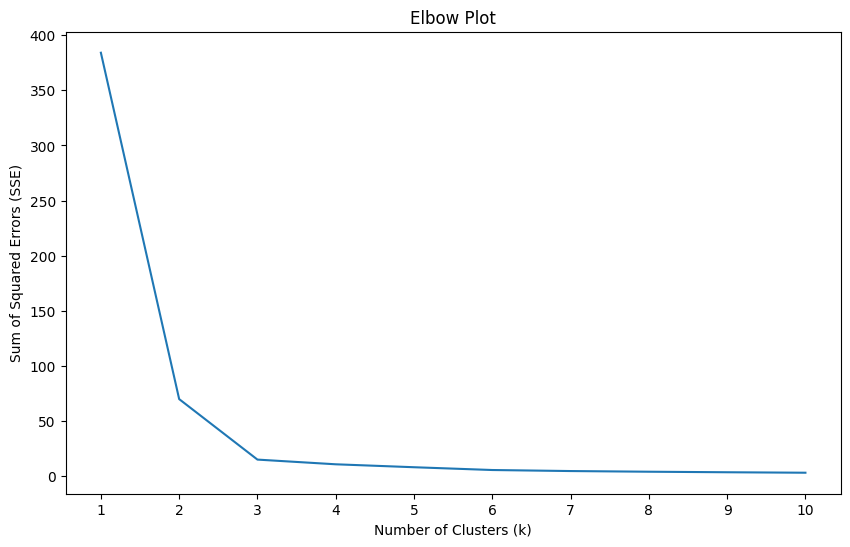

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Assuming your volatility data is in a DataFrame 'volatility_data'
X = weekly_price_data_rolling_volatility.values

# Define the range of values for k (number of clusters)
k_range = range(1, 11)

# Create an empty list to store the SSE (Sum of Squared Errors) for each value of k
sse = []

# Iterate over the range of k values
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia_ is the SSE for KMeans

# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Plot')
plt.xticks(k_range)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_rolling_52(volatility_data):
    # Assuming your volatility data is in a DataFrame 'volatility_data'

    # Calculate rolling volatility
    rolling_window = 52  # Set the rolling window size (e.g., 52 weeks)
    rolling_volatility = volatility_data.rolling(rolling_window).std()

    # Create a rolling plot for all assets
    fig, ax = plt.subplots(figsize=(12, 8))
    for col in rolling_volatility.columns:
        rolling_volatility[col].plot(ax=ax, label=col)

    ax.set_title('Rolling Volatility of Assets', fontsize=16)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Volatility', fontsize=14)
    ax.legend(loc='best', fontsize=12)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Adjust spacing between subplots
    plt.subplots_adjust(bottom=0.2)

    plt.show()


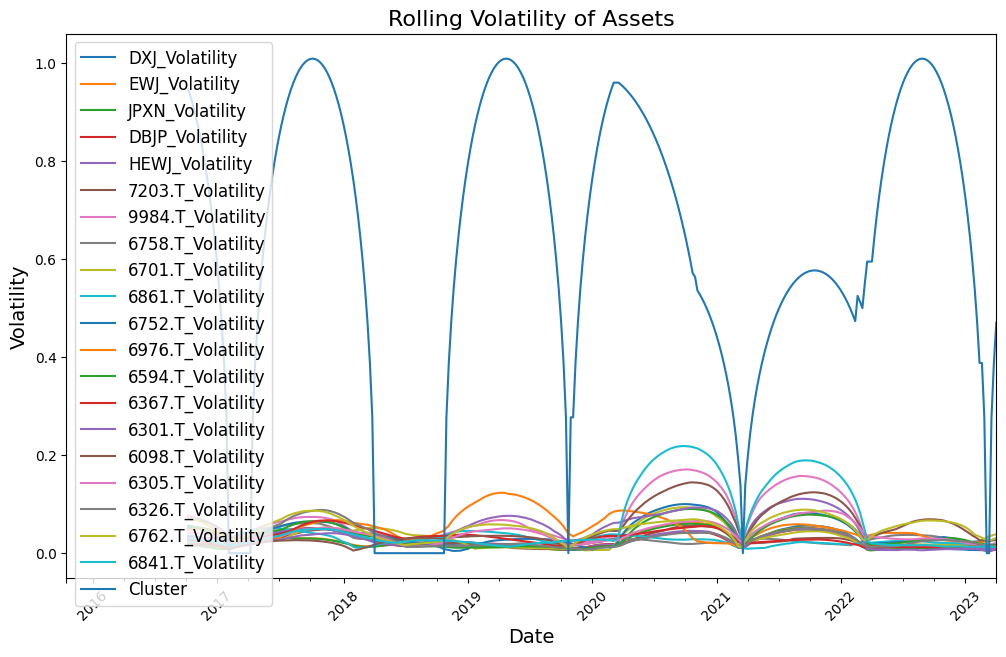

In [ ]:
plot_rolling_52(weekly_price_data_rolling_volatility)

In [ ]:
volatility_data = weekly_price_data_rolling_volatility

In [ ]:
volatility_data.columns

Index(['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility',
       'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility',
       '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility',
       '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility',
       '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility',
       '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility',
       '6762.T_Volatility', '6841.T_Volatility', 'Cluster'],
      dtype='object')

In [ ]:
# removing the outlier
volatility_data = volatility_data.drop('Cluster',axis=1)

In [ ]:
volatility_data


,DXJ_Volatility,EWJ_Volatility,JPXN_Volatility,DBJP_Volatility,HEWJ_Volatility,7203.T_Volatility,9984.T_Volatility,6758.T_Volatility,6701.T_Volatility,6861.T_Volatility,6752.T_Volatility,6976.T_Volatility,6594.T_Volatility,6367.T_Volatility,6301.T_Volatility,6098.T_Volatility,6305.T_Volatility,6326.T_Volatility,6762.T_Volatility,6841.T_Volatility
Date,,,,,,,,,,,,,,,,,,,,
2015-10-18,0.221023,0.180271,0.160104,0.232044,0.230846,0.191841,0.310654,0.399368,0.266038,0.323935,0.318564,0.407858,0.256864,0.310022,0.303242,0.233211,0.350901,0.300120,0.319666,0.341216
2015-10-25,0.221661,0.179626,0.159251,0.231132,0.230248,0.179486,0.301123,0.400020,0.246462,0.321466,0.312991,0.414239,0.258269,0.305859,0.302382,0.233956,0.351435,0.301281,0.321454,0.327180
2015-11-01,0.203070,0.166301,0.142861,0.204392,0.203508,0.171914,0.292716,0.390505,0.246971,0.286697,0.310521,0.412698,0.255152,0.297563,0.292369,0.234792,0.334974,0.287959,0.317723,0.313481
2015-11-08,0.204413,0.160894,0.137124,0.203622,0.204195,0.165523,0.292960,0.383585,0.248673,0.286988,0.300350,0.416049,0.255313,0.295026,0.286171,0.228969,0.331299,0.289305,0.329183,0.321444
2015-11-15,0.203213,0.160212,0.136620,0.201650,0.202738,0.164308,0.291591,0.379817,0.239723,0.286173,0.299912,0.367498,0.257422,0.301369,0.286271,0.221365,0.328030,0.289310,0.309493,0.321262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,0.146006,0.196116,0.195062,0.157346,0.156245,0.250766,0.376748,0.300977,0.221167,0.344090,0.300657,0.399637,0.335642,0.276673,0.277097,0.402171,0.327308,0.280218,0.406203,0.290186
2023-03-12,0.145519,0.191563,0.190329,0.156620,0.155757,0.243816,0.365232,0.301038,0.227416,0.339909,0.299955,0.395701,0.322354,0.276644,0.277156,0.402621,0.327295,0.280237,0.373771,0.291005
2023-03-19,0.142682,0.181060,0.180908,0.141747,0.140884,0.235360,0.360915,0.290596,0.223859,0.332787,0.296622,0.368861,0.309214,0.267543,0.284955,0.374316,0.340791,0.278696,0.369680,0.276086


In [ ]:
volatility_data.columns

Index(['DXJ_Volatility', 'EWJ_Volatility', 'JPXN_Volatility',
       'DBJP_Volatility', 'HEWJ_Volatility', '7203.T_Volatility',
       '9984.T_Volatility', '6758.T_Volatility', '6701.T_Volatility',
       '6861.T_Volatility', '6752.T_Volatility', '6976.T_Volatility',
       '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility',
       '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility',
       '6762.T_Volatility', '6841.T_Volatility'],
      dtype='object')

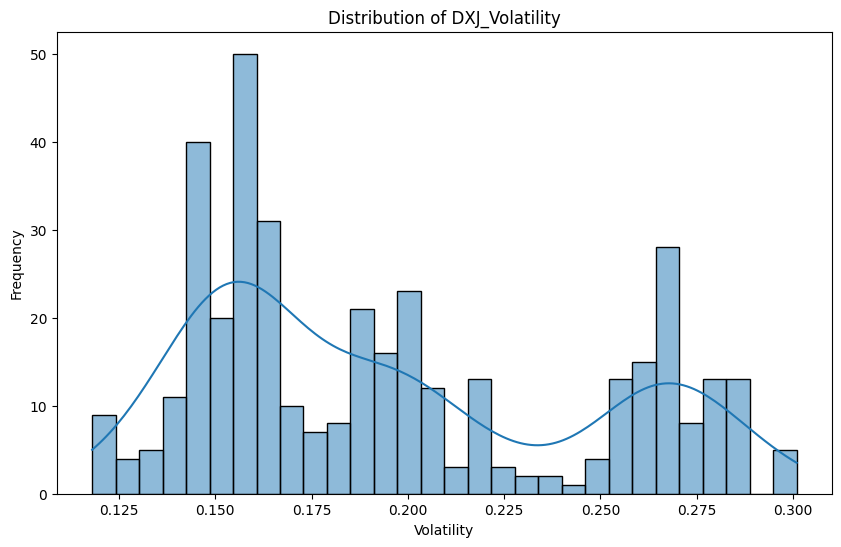

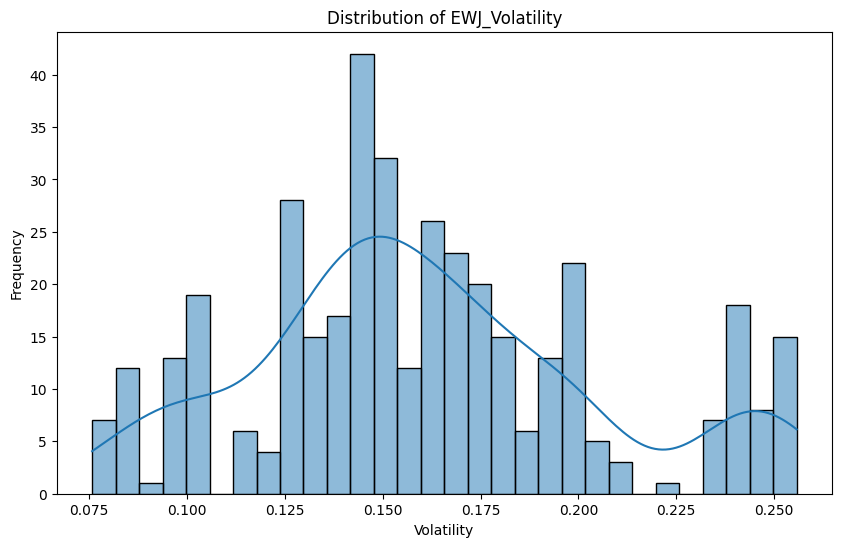

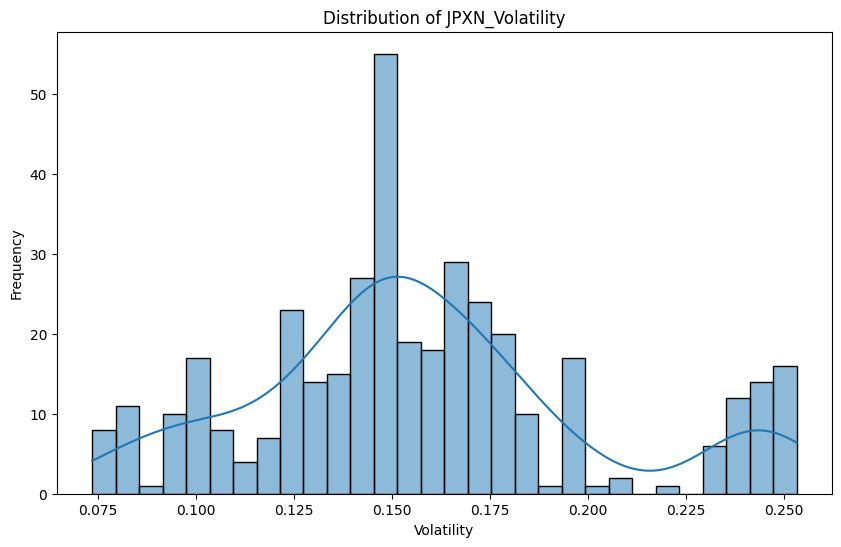

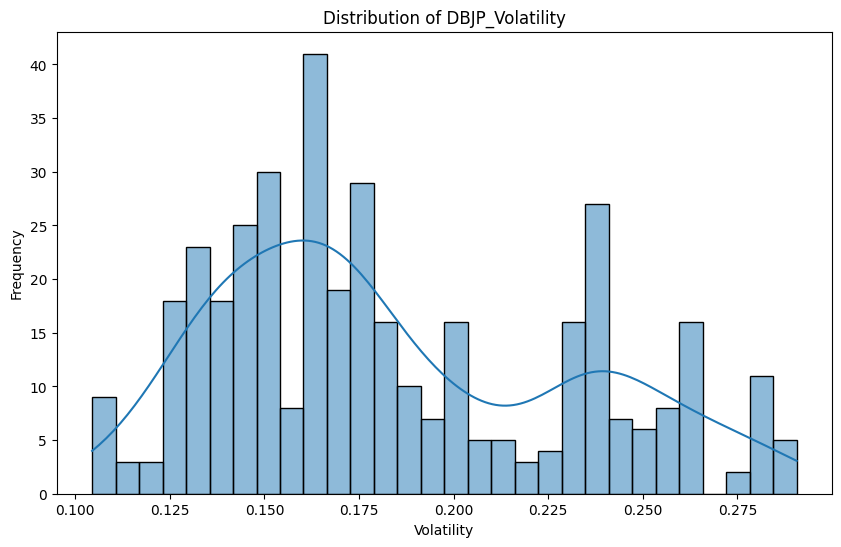

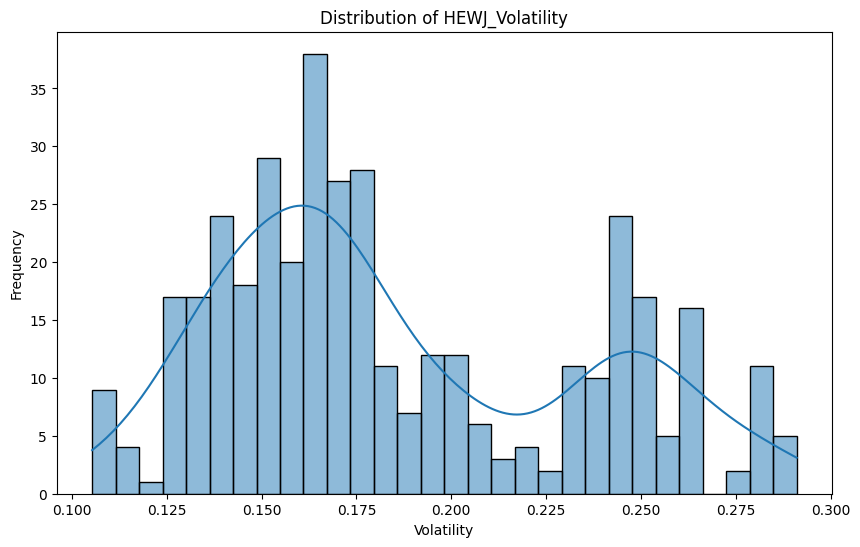

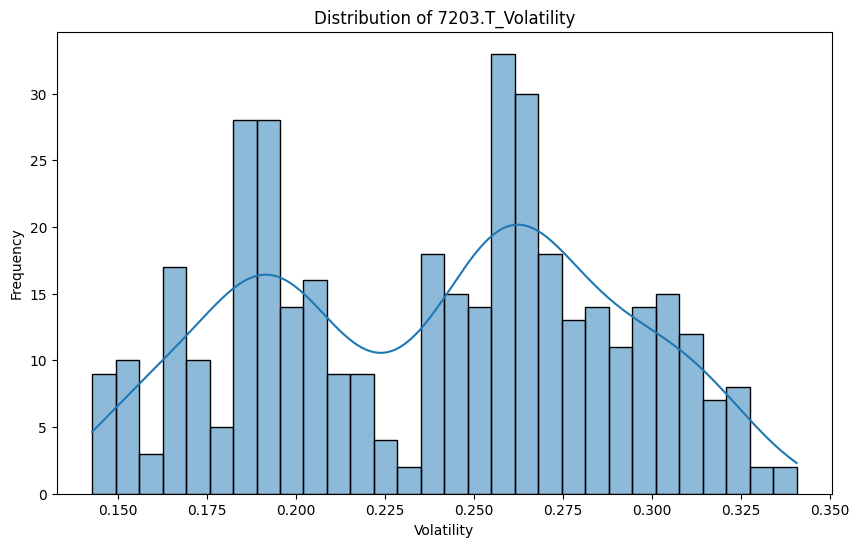

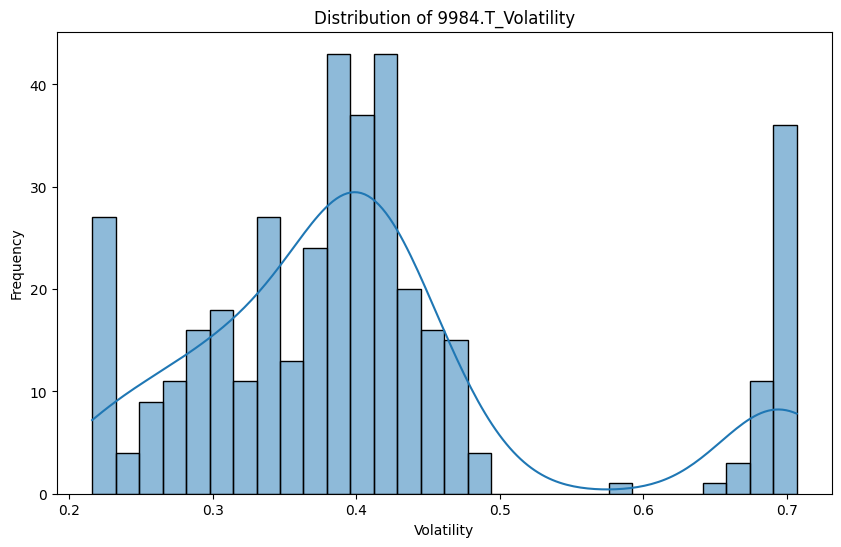

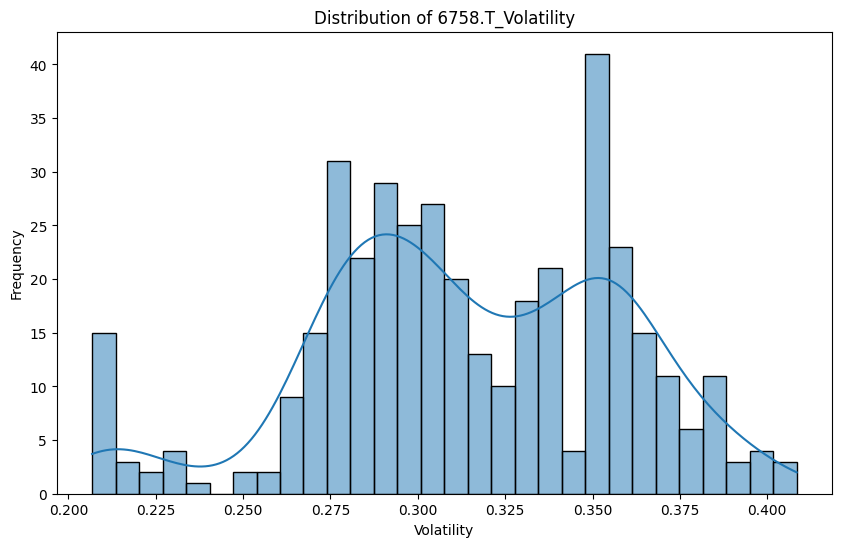

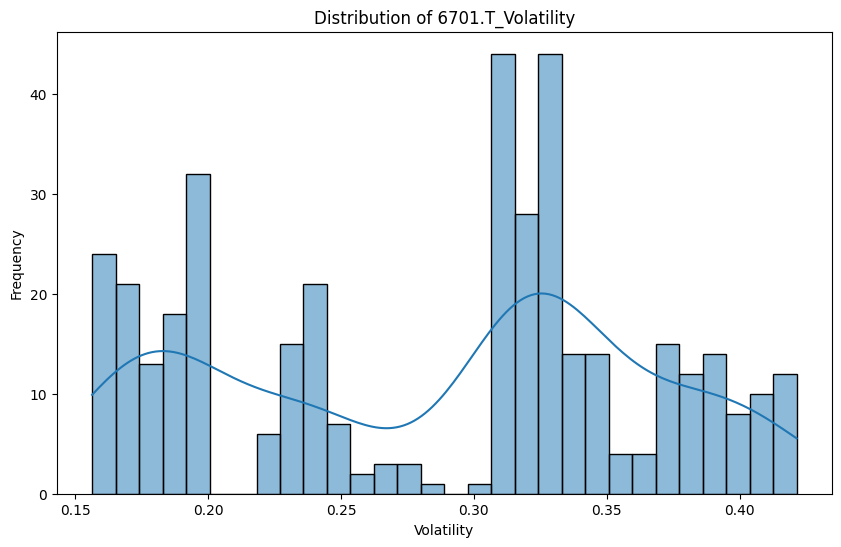

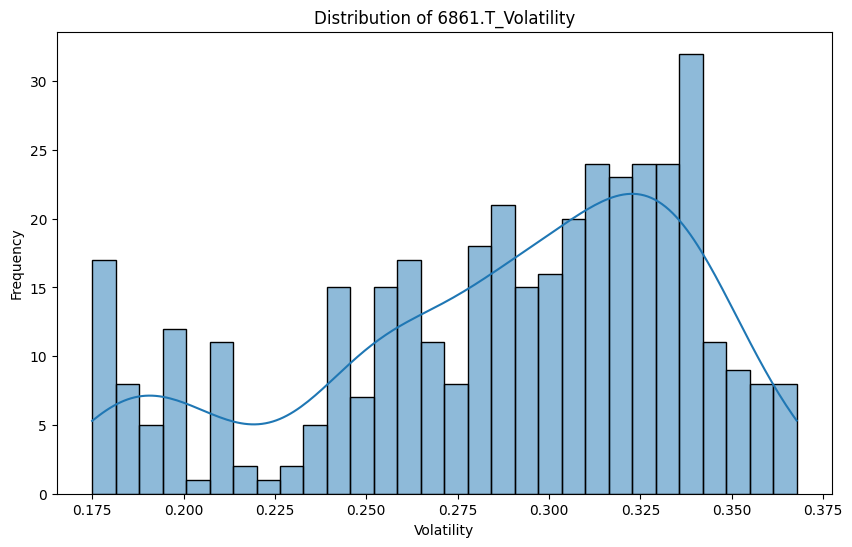

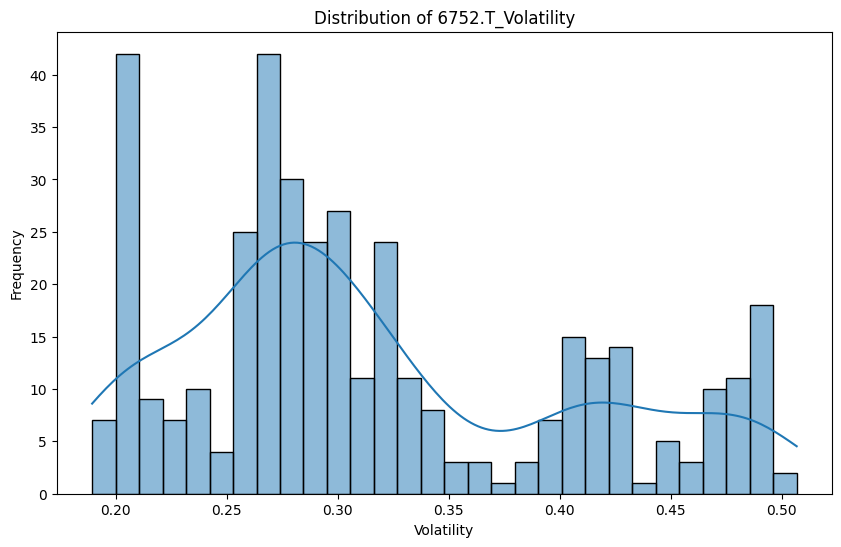

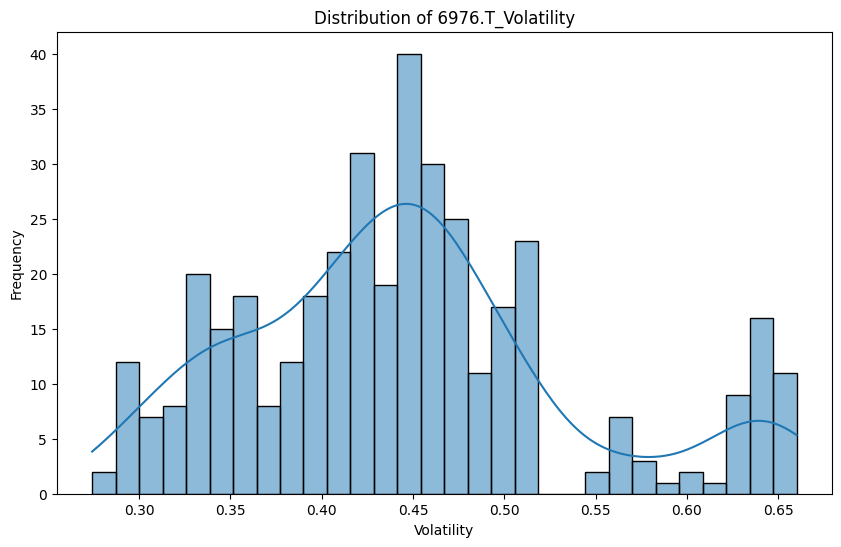

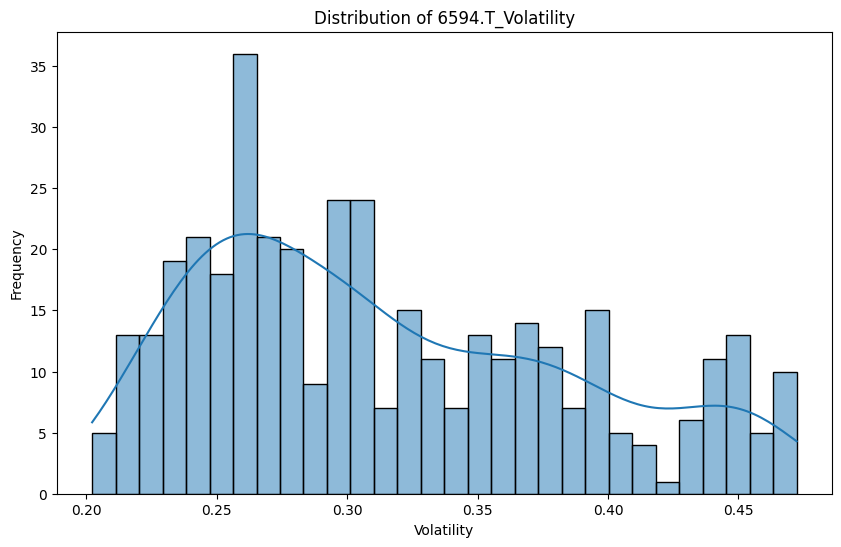

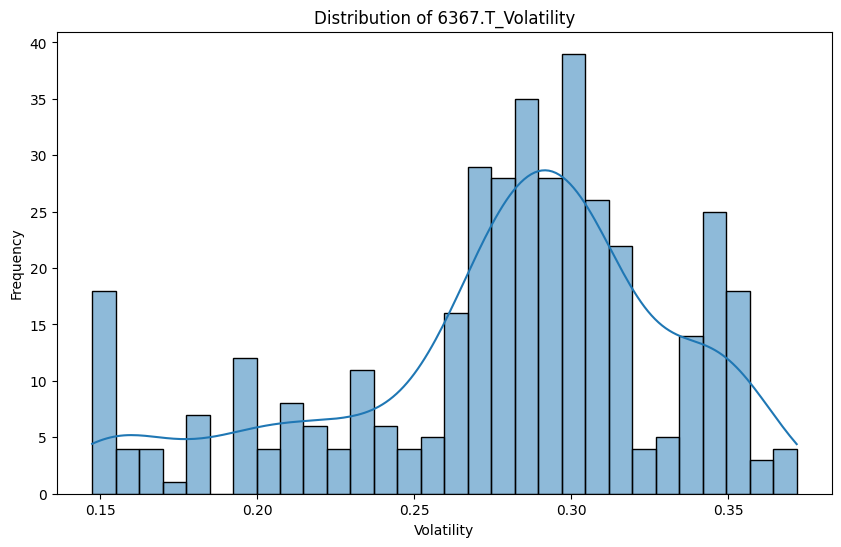

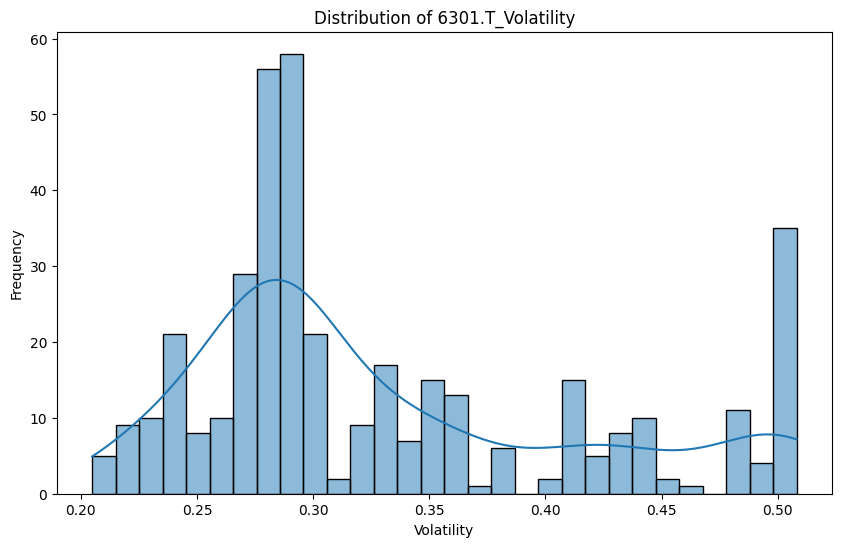

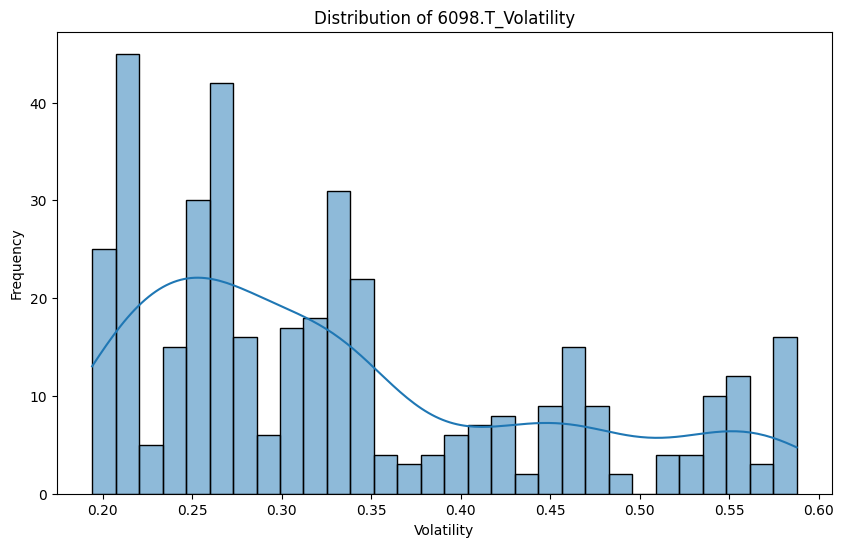

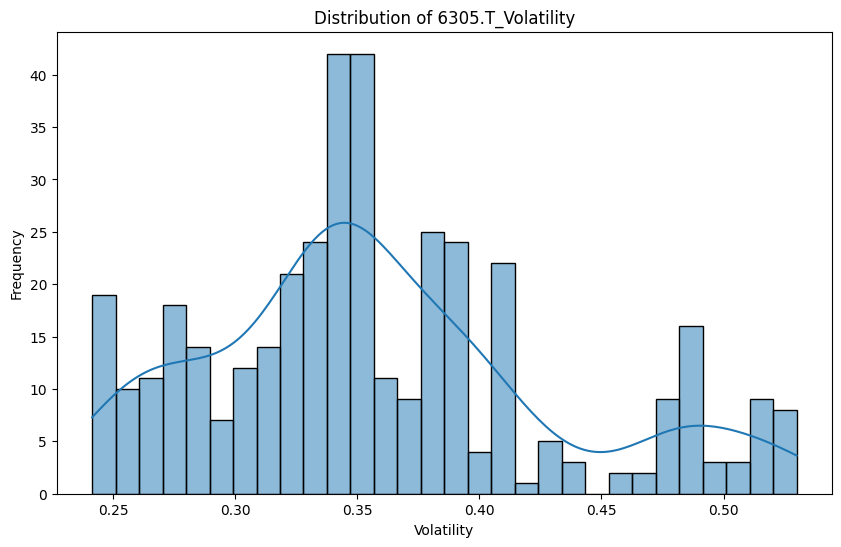

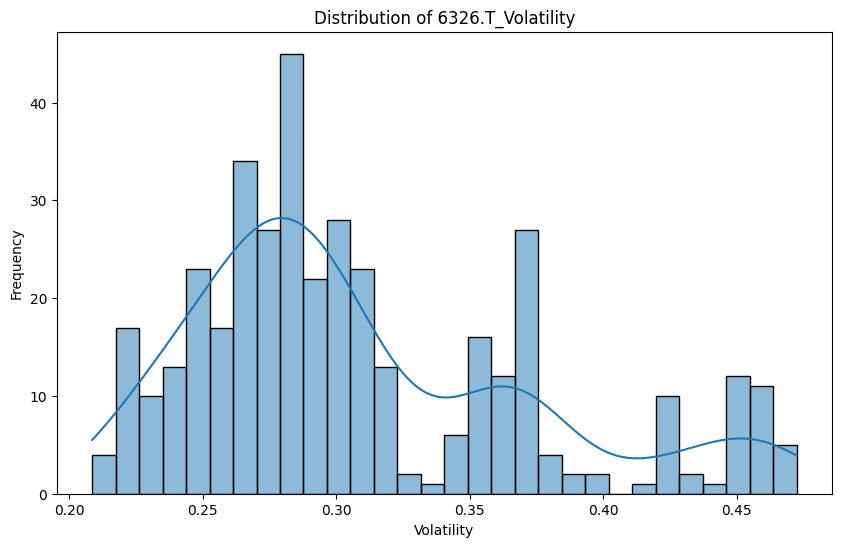

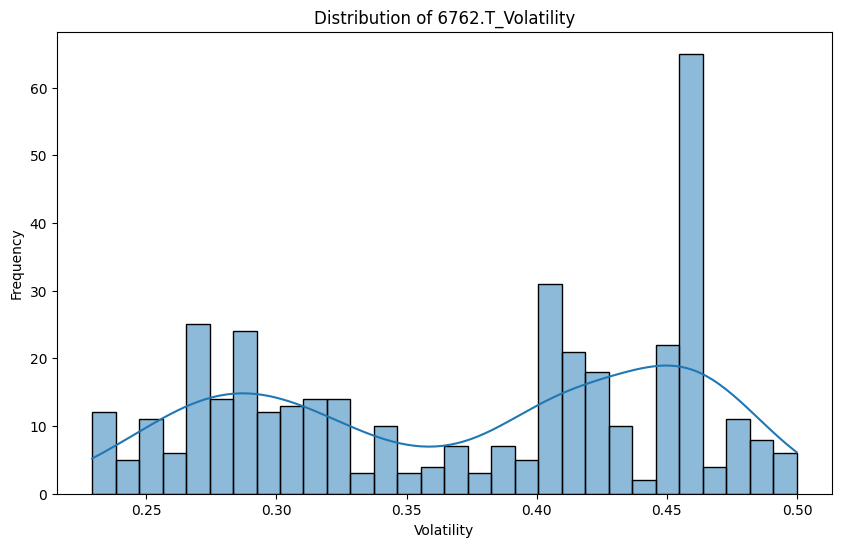

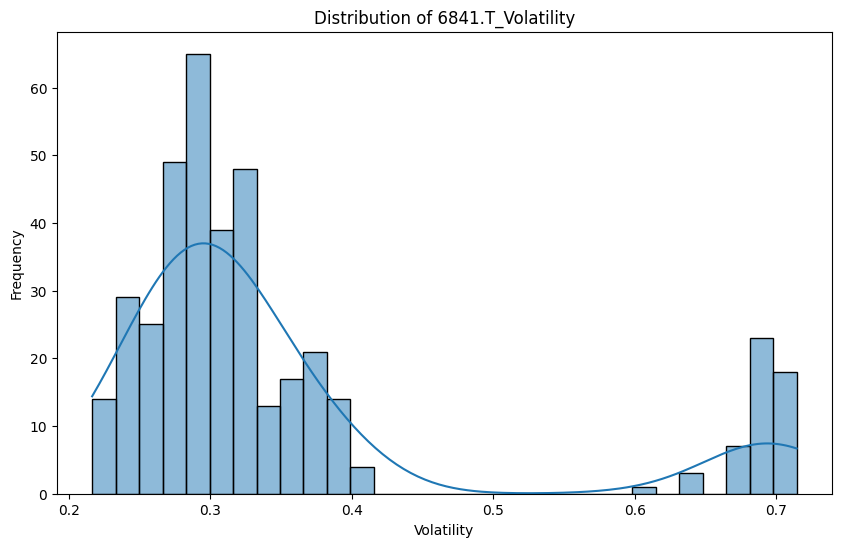

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming volatility_data is your DataFrame
# Loop through each column in the DataFrame except the first one (if it's a date or non-asset column)
for column in volatility_data.columns:
    # Create a new figure for each distribution plot
    plt.figure(figsize=(10, 6))

    # Use seaborn to create a distribution plot
    sns.histplot(volatility_data[column], kde=True, bins=30)

    # Set the title of the plot to the current column name
    plt.title(f'Distribution of {column}')

    # Label the x-axis as 'Volatility'
    plt.xlabel('Volatility')

    # Label the y-axis as 'Frequency'
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()

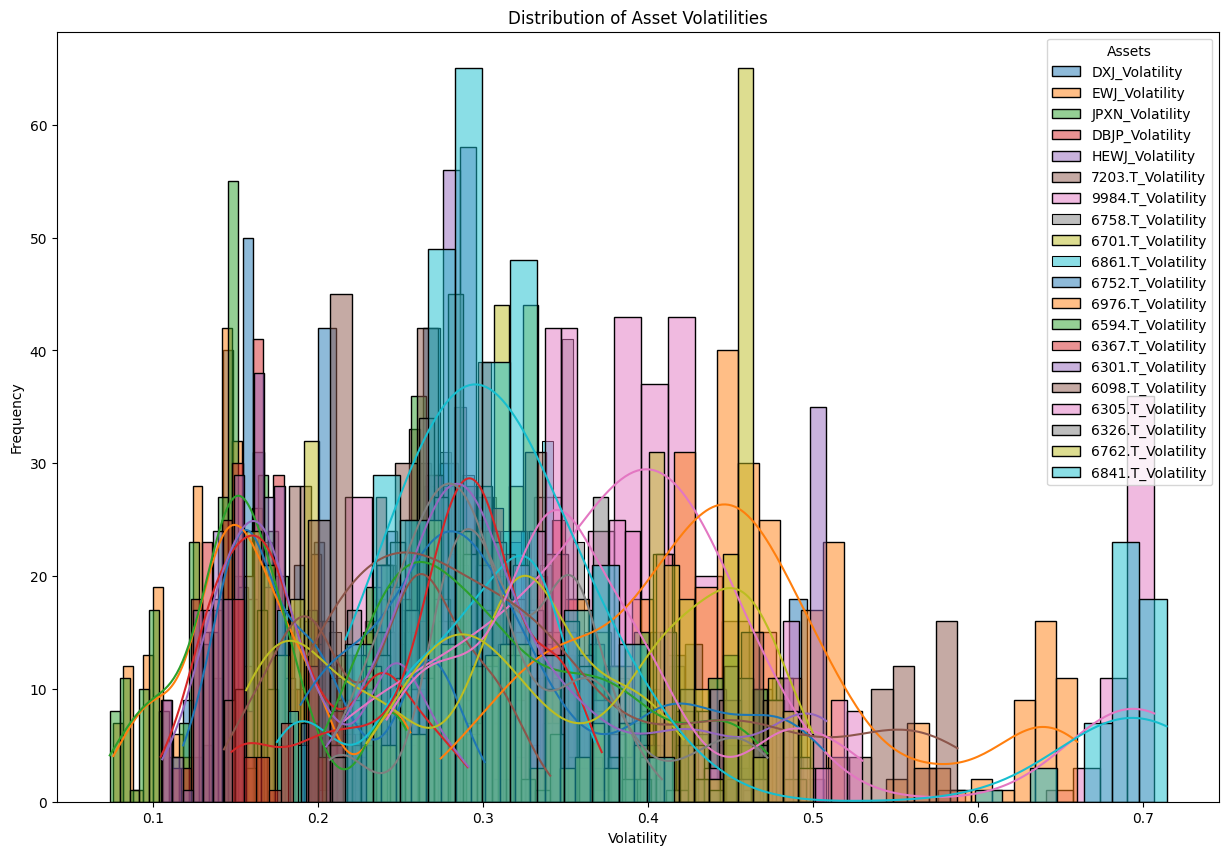

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the overall figure
plt.figure(figsize=(15, 10))

# Loop through each column in the DataFrame
for column in volatility_data.columns:
    # Use seaborn to create a distribution plot on the same figure
    sns.histplot(volatility_data[column], kde=True, bins=30, label=column)

# Set the title of the plot
plt.title('Distribution of Asset Volatilities')

# Label the x-axis and y-axis
plt.xlabel('Volatility')
plt.ylabel('Frequency')

# Add a legend to the plot to identify each distribution
plt.legend(title='Assets')

# Display the plot
plt.show()

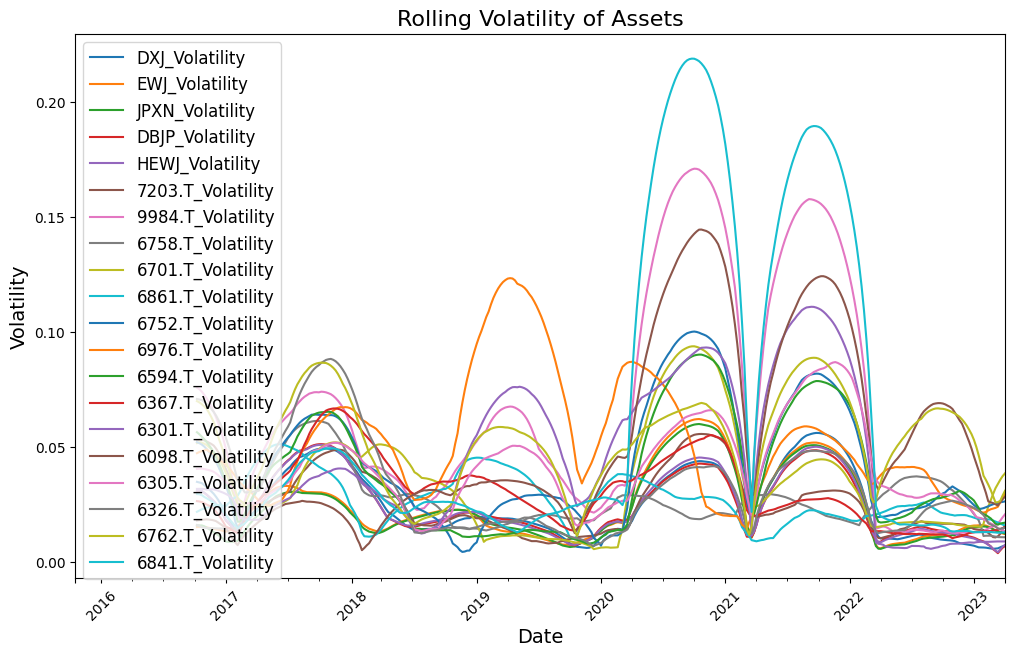

In [ ]:
plot_rolling_52(volatility_data)

In [ ]:
len(volatility_data.columns)

20

In [ ]:
rolling_window = 52  # Set the rolling window size (e.g., 52 weeks)
rolling_volatility = volatility_data.rolling(rolling_window).std()

In [ ]:
rolling_volatility.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 2015-10-18 to 2023-04-02
Freq: W-SUN
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DXJ_Volatility     339 non-null    float64
 1   EWJ_Volatility     339 non-null    float64
 2   JPXN_Volatility    339 non-null    float64
 3   DBJP_Volatility    339 non-null    float64
 4   HEWJ_Volatility    339 non-null    float64
 5   7203.T_Volatility  339 non-null    float64
 6   9984.T_Volatility  339 non-null    float64
 7   6758.T_Volatility  339 non-null    float64
 8   6701.T_Volatility  339 non-null    float64
 9   6861.T_Volatility  339 non-null    float64
 10  6752.T_Volatility  339 non-null    float64
 11  6976.T_Volatility  339 non-null    float64
 12  6594.T_Volatility  339 non-null    float64
 13  6367.T_Volatility  339 non-null    float64
 14  6301.T_Volatility  339 non-null    float64
 15  6098.T_Volatility  339 non-null    float64


In [ ]:
# Assuming 'volatility_data' is your DataFrame with rolling volatility data

# Define the volatility thresholds
high_vol_threshold = 0.65
low_vol_threshold = 0.3

# Find the maximum rolling volatility for each asset
max_rolling_volatility = volatility_data.max()

# Categorize assets based on their maximum rolling volatility
high_vol_assets = max_rolling_volatility[max_rolling_volatility > high_vol_threshold].index.tolist()
medium_vol_assets = max_rolling_volatility[(max_rolling_volatility <= high_vol_threshold) & (max_rolling_volatility > low_vol_threshold)].index.tolist()
low_vol_assets = max_rolling_volatility[max_rolling_volatility <= low_vol_threshold].index.tolist()

# Print the assets in each volatility bucket
print("High Volatility Assets (volatility > 0.65):")
print(high_vol_assets)
print(len(high_vol_assets))

print("\nMedium Volatility Assets (0.3 < volatility <= 0.65):")
print(medium_vol_assets)
print(len(medium_vol_assets))

print("\nLow Volatility Assets (volatility <= 0.3):")
print(low_vol_assets)
print(len(low_vol_assets))


High Volatility Assets (volatility > 0.65):
['9984.T_Volatility', '6976.T_Volatility', '6841.T_Volatility']
3

Medium Volatility Assets (0.3 < volatility <= 0.65):
['DXJ_Volatility', '7203.T_Volatility', '6758.T_Volatility', '6701.T_Volatility', '6861.T_Volatility', '6752.T_Volatility', '6594.T_Volatility', '6367.T_Volatility', '6301.T_Volatility', '6098.T_Volatility', '6305.T_Volatility', '6326.T_Volatility', '6762.T_Volatility']
13

Low Volatility Assets (volatility <= 0.3):
['EWJ_Volatility', 'JPXN_Volatility', 'DBJP_Volatility', 'HEWJ_Volatility']
4


In [44]:
returns_data = weekly_price_data_returns
returns_data


,DXJ_Close,EWJ_Close,JPXN_Close,DBJP_Close,HEWJ_Close,7203.T_Close,9984.T_Close,6758.T_Close,6701.T_Close,6861.T_Close,6752.T_Close,6976.T_Close,6594.T_Close,6367.T_Close,6301.T_Close,6098.T_Close,6305.T_Close,6326.T_Close,6762.T_Close,6841.T_Close
Date,,,,,,,,,,,,,,,,,,,,
2014-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-26,0.038665,0.029251,0.030868,0.044273,0.043056,0.073286,0.080844,0.045152,0.104938,0.059761,0.066371,0.040000,0.071174,0.061724,0.051537,0.021157,0.044582,0.042240,0.075507,0.102646
2014-11-02,0.094792,0.071048,0.072572,0.112692,0.112910,0.056414,0.075745,0.098330,0.078212,0.160548,0.082988,0.047842,0.045455,0.076461,0.074753,0.020718,0.109181,0.091737,0.054794,0.094546
2014-11-09,-0.012635,-0.040630,-0.039162,-0.025811,-0.017454,0.049092,-0.020028,0.089768,0.002591,0.023247,0.086207,0.020591,0.014816,0.047696,0.056716,0.052774,0.055033,0.024748,0.051948,0.007974
2014-11-16,0.027851,0.017286,0.014931,0.033308,0.029608,0.022297,0.046658,0.063552,-0.064599,0.042831,0.020458,0.207895,0.021422,-0.002522,-0.019220,-0.057841,0.055132,-0.011233,0.118827,0.012525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,0.029147,0.031643,0.030069,0.027751,0.027827,0.014263,-0.006970,0.016733,-0.001036,0.032948,0.033531,0.032609,0.001020,0.001284,0.044899,0.001898,0.087028,0.017647,0.030668,0.032779
2023-03-12,-0.014716,-0.010457,-0.009296,-0.016427,-0.017702,0.006102,-0.038337,0.013426,0.058091,0.004843,0.003696,0.000000,-0.006406,0.009190,0.000000,-0.043561,0.003021,0.011802,0.013815,0.030791
2023-03-19,-0.058335,-0.018845,-0.018765,-0.038395,-0.038516,-0.058017,-0.084597,-0.005983,-0.026471,0.008202,-0.053192,-0.028070,-0.058031,-0.042567,-0.074247,-0.015559,-0.112651,-0.081171,-0.049266,-0.050092


In [45]:


# Select two high volatility assets
selected_assets = ['9984.T_Close', '6976.T_Close']

# Assign equal weights to the selected assets
weights = np.array([0.5, 0.5])

# Calculate the covariance matrix for the selected assets

cov_matrix = returns_data[selected_assets].cov()

# Annualize the covariance matrix (assuming 52 weeks per year)
annual_cov_matrix = cov_matrix * 52

# Calculate portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(annual_cov_matrix, weights))

# Calculate portfolio standard deviation (volatility)
portfolio_volatility = np.sqrt(portfolio_variance)

# Store the portfolio volatility
print(f"The portfolio volatility based on 5 years of data is: {portfolio_volatility}")

The portfolio volatility based on 5 years of data is: 0.35943339318345263


In [46]:

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


target_assets = ['9984.T_Volatility', '6976.T_Volatility']
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_volatility_data = scaler.fit_transform(volatility_data[target_assets])

# Prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)

look_back = 10
X, Y = create_dataset(scaled_volatility_data, look_back)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, X.shape[2])))
model.add(Dense(X.shape[2]))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=1)

# Forecast the future volatility
def forecast_volatility(model, data, look_back, forecast_period):
    forecasted_volatility = []
    # Use the last look_back data points as the initial input
    input_data = data[-look_back:]
    for _ in range(forecast_period):
        # Reshape the input data and make a prediction
        input_data_reshaped = input_data.reshape(1, look_back, data.shape[1])
        prediction = model.predict(input_data_reshaped)
        # Append the prediction
        forecasted_volatility.append(prediction[0])
        # Update the input data with the prediction
        input_data = np.vstack((input_data[1:], prediction))
    return np.array(forecasted_volatility)

# Forecast for the next 1 month (assuming 4 weeks in a month)
forecast_period_1_month = 4
forecasted_volatility_1_month = forecast_volatility(model, scaled_volatility_data, look_back, forecast_period_1_month)

# Forecast for the next 1 year (assuming 52 weeks in a year)
forecast_period_1_year = 52
forecasted_volatility_1_year = forecast_volatility(model, scaled_volatility_data, look_back, forecast_period_1_year)

# Inverse transform the forecasted data
forecasted_volatility_1_month = scaler.inverse_transform(forecasted_volatility_1_month)
forecasted_volatility_1_year = scaler.inverse_transform(forecasted_volatility_1_year)

# Calculate the portfolio volatility based on the forecasted volatilities
# (You would need to repeat the forecasting process for each asset and then calculate the portfolio volatility as shown previously)

# Implement rebalancing strategy and compare returns
# (This would involve additional steps not shown here)

Epoch 1/100
304/304 [==============================] - 4s 4ms/step - loss: 0.0135
Epoch 2/100
304/304 [==============================] - 1s 4ms/step - loss: 0.0066
Epoch 3/100
304/304 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 4/100
304/304 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 5/100
304/304 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 6/100
304/304 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 7/100
304/304 [==============================] - 1s 4ms/step - loss: 0.0026
Epoch 8/100
304/304 [==============================] - 2s 6ms/step - loss: 0.0023
Epoch 9/100
304/304 [==============================] - 2s 6ms/step - loss: 0.0021
Epoch 10/100
304/304 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 11/100
304/304 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 12/100
304/304 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 13/100


In [48]:

print(forecasted_volatility_1_month)

print("\n ")
print("===========================")
print("===========================")
print("===========================")
print("\n")
print(forecasted_volatility_1_year)




[[0.34770024 0.35120928]
 [0.34570462 0.3454927 ]
 [0.3436025  0.33798864]
 [0.34477597 0.3290691 ]]

 


[[0.34770024 0.35120928]
 [0.34570462 0.3454927 ]
 [0.3436025  0.33798864]
 [0.34477597 0.3290691 ]
 [0.34326938 0.320807  ]
 [0.33859622 0.3134072 ]
 [0.33153462 0.30671582]
 [0.32377645 0.30013636]
 [0.31593257 0.29316983]
 [0.30776304 0.28619075]
 [0.2989232  0.27964184]
 [0.28950542 0.27349222]
 [0.2796605  0.26776254]
 [0.2695882  0.26246265]
 [0.25947967 0.25761008]
 [0.24945407 0.25333935]
 [0.23962796 0.24983275]
 [0.23016624 0.24726433]
 [0.22130105 0.24576269]
 [0.2133205  0.24541056]
 [0.20651956 0.24628648]
 [0.20115894 0.24848123]
 [0.19744271 0.25205773]
 [0.19549558 0.25701118]
 [0.19535242 0.26325387]
 [0.19695503 0.27061564]
 [0.2001527  0.27886292]
 [0.2047099  0.28772047]
 [0.21032389 0.29688713]
 [0.21665514 0.3060498 ]
 [0.22336707 0.31490076]
 [0.23016486 0.32316053]
 [0.2368231  0.33059976]
 [0.24319854 0.33705333]
 [0.24922886 0.3424234 ]
 [0.25492015 0.3466

In [ ]:


weights = np.array([0.5, 0.5])

rebalancing_threshold = 0.4  # Example threshold


rebalance_needed = np.any(forecasted_volatility_1_month > rebalancing_threshold)


if rebalance_needed:
    # Example: reduce the weight of the asset with higher volatility
    weights = np.array([0.6, 0.4]) if forecasted_volatility_1_month[0] > forecasted_volatility_1_month[1] else np.array([0.4, 0.6])

# Assume 'returns_data' contains historical returns for the assets
# Calculate expected portfolio return based on new weights
expected_portfolio_return = (returns_data[selected_assets] * weights).sum(axis=1).mean()

print(f"Expected portfolio return after rebalancing: {expected_portfolio_return}")

# Todo!
# Implement the rebalancing by adjusting the portfolio to match the new weights
# This would involve buying/selling assets in a real-world scenario

# Compare the returns of the rebalanced portfolio to a non-rebalanced portfolio over time
# This step would require tracking the performance of both strategies over the same period